In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path = "C:\\Users\\91748\\Desktop\\monthly_annual data.csv"
df = pd.read_csv(file_path)

# Initialize a dictionary to store the transformed data
data = {}

# Loop through the rows of the DataFrame to reshape the data
for index, row in df.iterrows():
    parameter = row['PARAMETER']
    year = row['YEAR']
    for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
        month_year = f"{year} {month.capitalize()}"
        value = row[month]
        if month_year not in data:
            data[month_year] = {}
        data[month_year][parameter] = value

# Convert the dictionary to a DataFrame
new_df = pd.DataFrame.from_dict(data, orient='index')

# Reset the index to turn the index into a column
new_df = new_df.reset_index()
new_df.columns = ['Month_Year'] + df['PARAMETER'].unique().tolist()

# Save the transformed DataFrame to a new CSV file
new_df.to_csv('newWeather.csv', index=False)


In [2]:
# Display the DataFrame
print(new_df)


    Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0     2003 Jan  99.42  26.12  64.50  348.12  1.48         0.00
1     2003 Feb  99.25  28.18  61.75  303.25  1.86         0.00
2     2003 Mar  99.16  29.47  60.81  292.50  1.95         0.00
3     2003 Apr  99.02  29.82  66.88  286.19  1.84         0.00
4     2003 May  98.98  29.49  70.25  296.38  2.47         0.00
..         ...    ...    ...    ...     ...   ...          ...
235   2022 Aug  98.88  25.35  90.62  284.12  2.64        32.15
236   2022 Sep  99.02  25.39  88.38  274.94  2.06        12.72
237   2022 Oct  99.12  25.72  83.50  278.69  1.45         4.31
238   2022 Nov  99.20  26.10  76.31  195.88  1.05         1.73
239   2022 Dec  99.17  26.09  73.19   38.50  1.24         1.42

[240 rows x 7 columns]


In [3]:
import pandas as pd

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the DataFrame
print(new_df)

# Reset display options to default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


    Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0     2003 Jan  99.42  26.12  64.50  348.12  1.48         0.00
1     2003 Feb  99.25  28.18  61.75  303.25  1.86         0.00
2     2003 Mar  99.16  29.47  60.81  292.50  1.95         0.00
3     2003 Apr  99.02  29.82  66.88  286.19  1.84         0.00
4     2003 May  98.98  29.49  70.25  296.38  2.47         0.00
5     2003 Jun  98.88  26.97  84.56  246.62  2.44        42.19
6     2003 Jul  98.94  25.63  91.69  255.50  2.37        26.37
7     2003 Aug  99.03  25.46  90.62  275.19  2.31        15.82
8     2003 Sep  99.11  25.63  87.38  285.81  2.02         5.27
9     2003 Oct  99.08  26.01  85.12  258.06  1.41         5.27
10    2003 Nov  99.25  26.02  75.38  103.12  1.20         0.00
11    2003 Dec  99.37  25.13  65.06   59.19  1.45         0.00
12    2004 Jan  99.29  25.98  64.00  318.12  1.73         0.00
13    2004 Feb  99.28  27.68  57.12  293.50  1.79         0.00
14    2004 Mar  99.12  29.49  62.38  274.69  1.88      

In [4]:
# Export the DataFrame to a CSV file
new_df.to_csv('newWeather.csv', index=False)

# Now you can open 'newWeather.csv' in Excel or any other CSV viewer to see all the data



In [5]:
import pandas as pd

# Load the new CSV file into a DataFrame
file_path = "newWeather.csv"
df = pd.read_csv(file_path)

# Display the first few rows to verify the data
print(df.head())


  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0


In [6]:
# Remove rows with missing values
df.dropna(inplace=True)

# Optionally, you can remove outliers or handle them as needed
# For demonstration, let's remove rows where any column has a value that is an extreme outlier

# Define a function to detect outliers using Z-score
from scipy import stats
import numpy as np

def remove_outliers(df, z_thresh=3):
    return df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < z_thresh).all(axis=1)]

# Remove outliers
df = remove_outliers(df)

# Display the DataFrame after cleaning
print(df.head())


  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0


##### Check for missing values
print(df.isnull().sum())



In [7]:
from scipy import stats
import numpy as np

def remove_outliers(df, z_thresh=3):
    return df[(np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) < z_thresh).all(axis=1)]

# Remove outliers
df_clean = remove_outliers(df)

# Display the DataFrame after cleaning
print(df_clean.head())
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)


  Month_Year     PS    T2M   RH2M    WD2M  WS2M  PRECTOTCORR
0   2003 Jan  99.42  26.12  64.50  348.12  1.48          0.0
1   2003 Feb  99.25  28.18  61.75  303.25  1.86          0.0
2   2003 Mar  99.16  29.47  60.81  292.50  1.95          0.0
3   2003 Apr  99.02  29.82  66.88  286.19  1.84          0.0
4   2003 May  98.98  29.49  70.25  296.38  2.47          0.0
Original shape: (237, 7)
Shape after removing outliers: (235, 7)


In [8]:
df

,Month_Year,PS,T2M,RH2M,WD2M,WS2M,PRECTOTCORR
0,2003 Jan,99.42,26.12,64.50,348.12,1.48,0.00
1,2003 Feb,99.25,28.18,61.75,303.25,1.86,0.00
2,2003 Mar,99.16,29.47,60.81,292.50,1.95,0.00
3,2003 Apr,99.02,29.82,66.88,286.19,1.84,0.00
4,2003 May,98.98,29.49,70.25,296.38,2.47,0.00
...,...,...,...,...,...,...,...
235,2022 Aug,98.88,25.35,90.62,284.12,2.64,32.15
236,2022 Sep,99.02,25.39,88.38,274.94,2.06,12.72
237,2022 Oct,99.12,25.72,83.50,278.69,1.45,4.31
238,2022 Nov,99.20,26.10,76.31,195.88,1.05,1.73


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
data=df_clean

In [11]:
X=data[data.columns[1:6]]
y=data['PRECTOTCORR']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

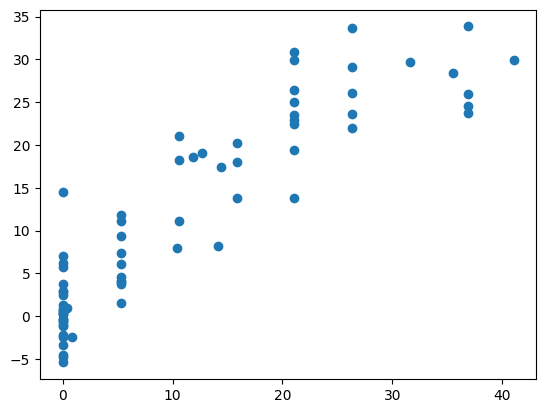

In [12]:
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)

In [13]:
model.intercept_

1848.876618013475

In [14]:
model.coef_

array([-1.83204472e+01, -2.53700544e+00,  2.33048919e-01, -8.55892878e-03,
        1.47651014e+01])

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
X_train_poly=poly_reg.fit_transform(X_train)
X_test_poly=poly_reg.fit_transform(X_test)
model2=LinearRegression()
model2.fit(X_train_poly,y_train)

LinearRegression()

In [16]:
predictions2=model2.predict(X_test_poly)

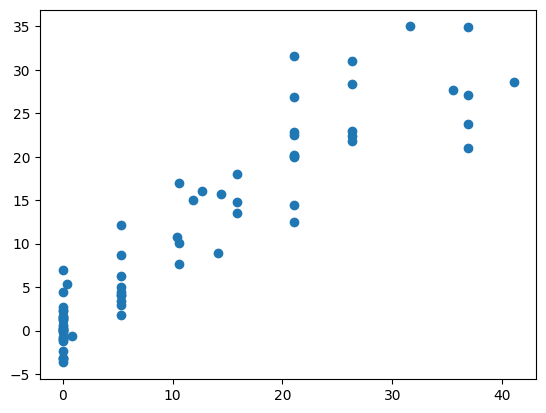

In [17]:
plt.scatter(y_test,predictions2)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df_clean is already defined and cleaned
data = df_clean

# Splitting data into features and target variable
X = data[data.columns[1:6]]  # Assuming the first column is 'Month_Year' which we are not using as a feature
y = data['PRECTOTCORR']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Training Polynomial Regression Model
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)  # Use transform instead of fit_transform for the test set

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)

# New test data (replace with your actual new test data)
new_test_data = {
    'PS': [99.28, 98.97],  # Example pressure values
    'T2M': [27.68, 25.78],     # Example temperature values
    'RH2M': [57.12, 91.31],    # Example humidity values
    'WD2M': [293.5, 271.56],    # Example wind direction values
    'WS2M': [1.79, 3.02]       # Example wind speed values
}

# Create a DataFrame for the new test data
new_test_df = pd.DataFrame(new_test_data)

# Linear Regression Prediction
linear_predictions = model.predict(new_test_df)

# Polynomial Regression Prediction
new_test_poly = poly_reg.transform(new_test_df)
poly_predictions = model2.predict(new_test_poly)

# Print predictions
print("Linear Regression Predictions:", linear_predictions)
print("Polynomial Regression Predictions:", poly_predictions)


Linear Regression Predictions: [-2.97244801 33.84400116]
Polynomial Regression Predictions: [ 0.51102835 34.92139971]


Linear Regression Test MSE: 27.362019122092143
Polynomial Regression Test MSE: 20.76597235189405


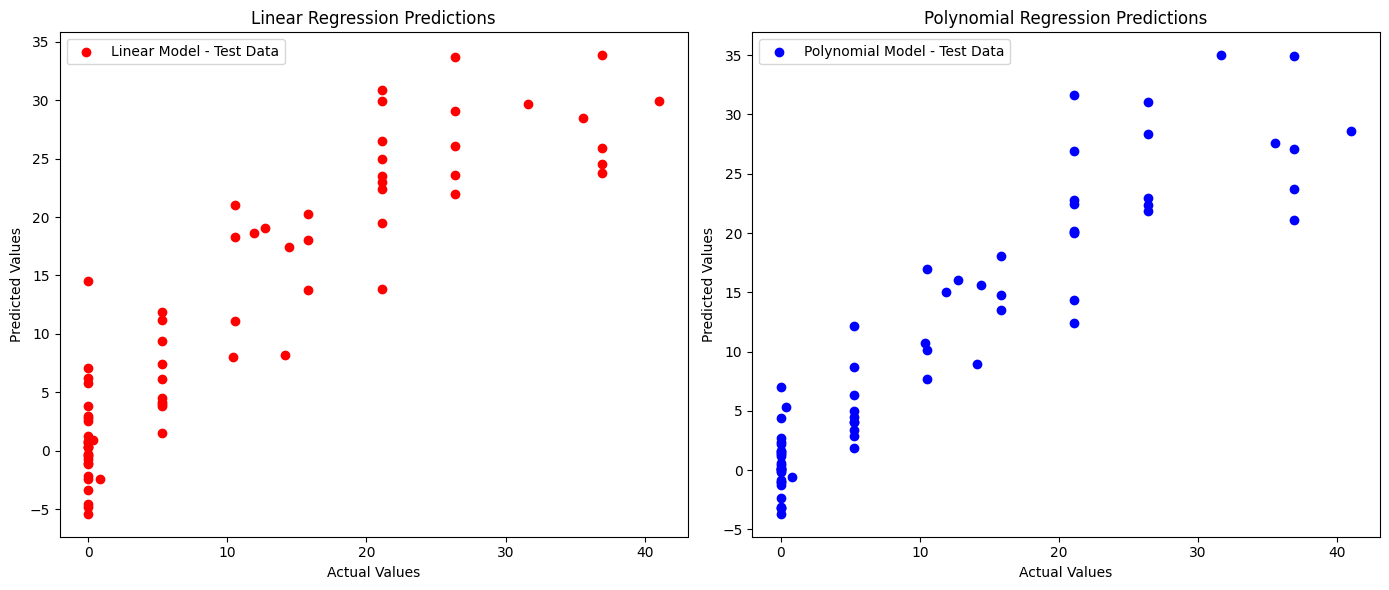

In [19]:
from sklearn.metrics import mean_squared_error

# Evaluate Linear Regression Model
linear_test_predictions = model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_test_predictions)
print(f"Linear Regression Test MSE: {linear_mse}")

# Evaluate Polynomial Regression Model
poly_test_predictions = model2.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_test_predictions)
print(f"Polynomial Regression Test MSE: {poly_mse}")

# Visualizing Predictions for Training and Test Sets
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_test_predictions, color='red', label='Linear Model - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, poly_test_predictions, color='blue', label='Polynomial Model - Test Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression Predictions')
plt.legend()

plt.tight_layout()
plt.show()


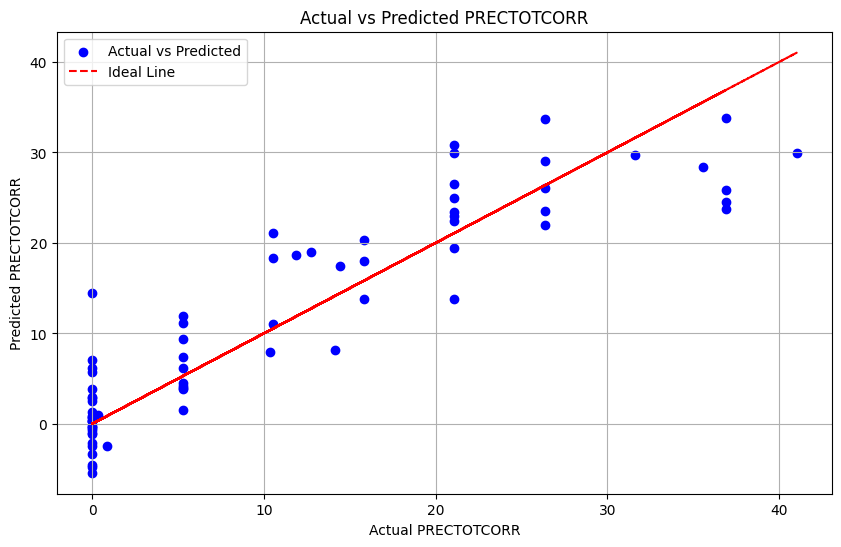

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model` is your trained linear or polynomial regression model

# Compute predictions on the test set
X_test_subset = X_test.iloc[:, :5]  # Taking the first 5 columns of X_test
predictions = model.predict(X_test_subset)

# Extract actual PRECTOTCORR values from y_test
actual_values = y_test.values

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values[:], predictions[:], color='blue', label='Actual vs Predicted')
plt.plot(actual_values[:], actual_values[:], color='red', label='Ideal Line', linestyle='--')
plt.xlabel('Actual PRECTOTCORR')
plt.ylabel('Predicted PRECTOTCORR')
plt.title('Actual vs Predicted PRECTOTCORR')
plt.legend()
plt.grid(True)
plt.show()


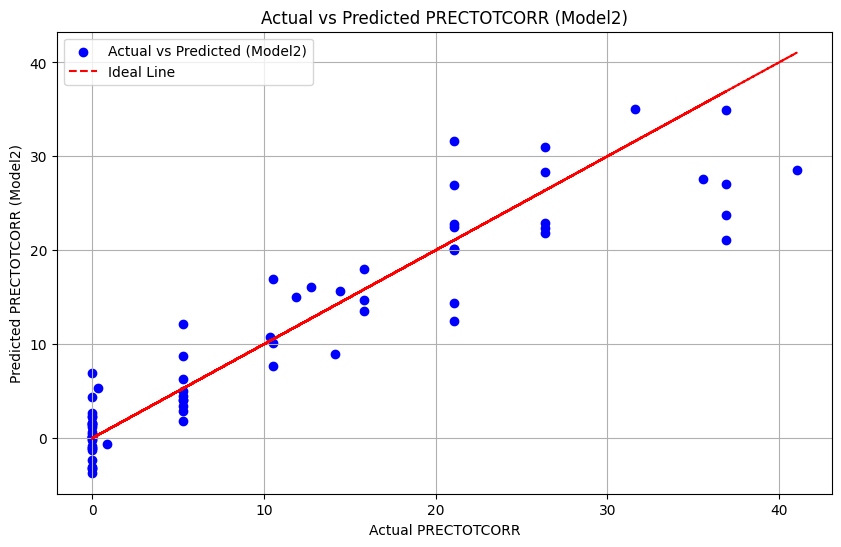

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `model2` is your trained polynomial regression model and `poly_reg` is the PolynomialFeatures object

# Transform the test set for polynomial regression
X_test_poly = poly_reg.transform(X_test)

# Compute predictions on the transformed test set for model2
predictions_poly = model2.predict(X_test_poly)

# Extract actual PRECTOTCORR values from y_test
actual_values = y_test.values

# Plotting for model2
plt.figure(figsize=(10, 6))
plt.scatter(actual_values[:], predictions_poly[:], color='blue', label='Actual vs Predicted (Model2)')
plt.plot(actual_values[:], actual_values[:], color='red', label='Ideal Line', linestyle='--')
plt.xlabel('Actual PRECTOTCORR')
plt.ylabel('Predicted PRECTOTCORR (Model2)')
plt.title('Actual vs Predicted PRECTOTCORR (Model2)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions with Gradient Boosting
gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)

# Evaluate Gradient Boosting model
print("\nGradient Boosting Regressor Performance on Training Data:")
print("MAE:", mean_absolute_error(y_train, gb_train_predictions))
print("MSE:", mean_squared_error(y_train, gb_train_predictions))
print("R-squared:", r2_score(y_train, gb_train_predictions))

print("Gradient Boosting Regressor Performance on Test Data:")
print("MAE:", mean_absolute_error(y_test, gb_test_predictions))
print("MSE:", mean_squared_error(y_test, gb_test_predictions))
print("R-squared:", r2_score(y_test, gb_test_predictions))

# Plot Gradient Boosting predictions
plt.scatter(y_test, gb_test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Gradient Boosting Regressor Predictions")
plt.show()



Gradient Boosting Regressor Performance on Training Data:


NameError: name 'mean_absolute_error' is not defined

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Evaluate Random Forest model
print("\nRandom Forest Regressor Performance on Training Data:")
print("MAE:", mean_absolute_error(y_train, rf_train_predictions))
print("MSE:", mean_squared_error(y_train, rf_train_predictions))
print("R-squared:", r2_score(y_train, rf_train_predictions))

print("Random Forest Regressor Performance on Test Data:")
print("MAE:", mean_absolute_error(y_test, rf_test_predictions))
print("MSE:", mean_squared_error(y_test, rf_test_predictions))
print("R-squared:", r2_score(y_test, rf_test_predictions))

# Plot Random Forest predictions
plt.scatter(y_test, rf_test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regressor Predictions")
plt.show()



Random Forest Regressor Performance on Training Data:


NameError: name 'mean_absolute_error' is not defined


Linear Regression Performance on Training Data:
MAE: 4.275201389138129
MSE: 33.296833215543145
R-squared: 0.8095122492083414
Linear Regression Performance on Test Data:
MAE: 3.945534363455783
MSE: 27.362019122092143
R-squared: 0.8170705455026321

Polynomial Regression Performance on Training Data:
MAE: 2.9176648347294125
MSE: 20.201764742357607
R-squared: 0.884427786183655
Polynomial Regression Performance on Test Data:
MAE: 3.180247389373081
MSE: 20.76597235189405
R-squared: 0.8611685790624889

Random Forest Regressor Performance on Training Data:
MAE: 1.0766908536585338
MSE: 3.955930659939012
R-squared: 0.977368528447691
Random Forest Regressor Performance on Test Data:
MAE: 2.757023943661971
MSE: 18.75071369112677
R-squared: 0.8746416406022934

Gradient Boosting Regressor Performance on Training Data:
MAE: 0.6677802463176119
MSE: 0.980074584303313
R-squared: 0.9943930943233107
Gradient Boosting Regressor Performance on Test Data:
MAE: 3.058033336562812
MSE: 26.3820860327583
R-squar

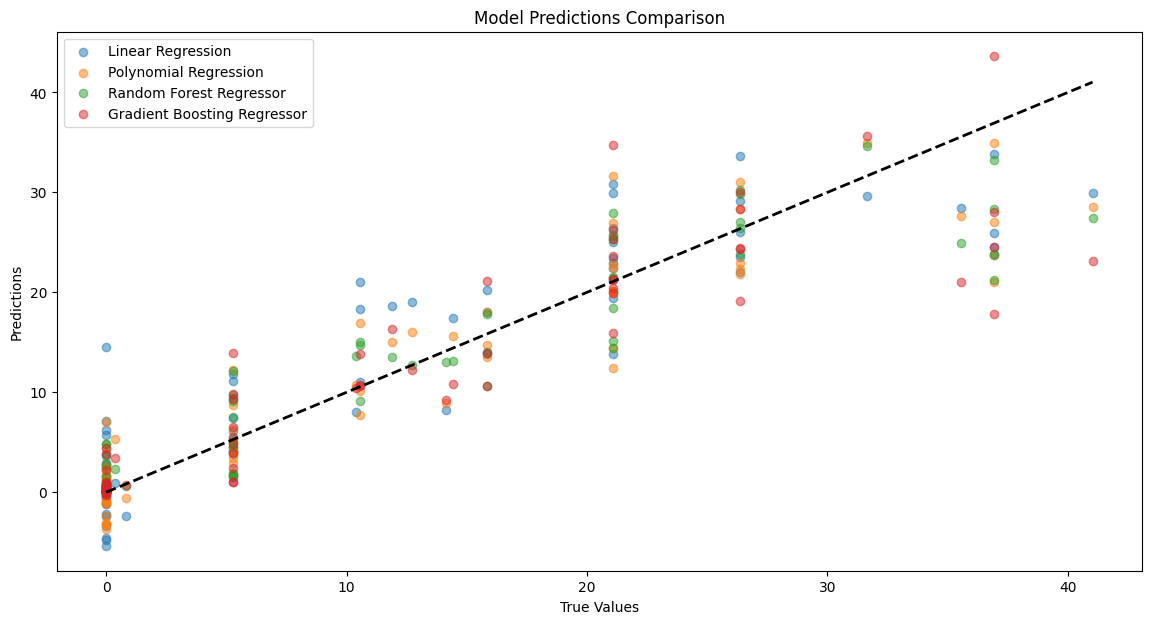

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to evaluate and print model performance
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    print(f"\n{name} Performance on Training Data:")
    print("MAE:", mean_absolute_error(y_train, train_predictions))
    print("MSE:", mean_squared_error(y_train, train_predictions))
    print("R-squared:", r2_score(y_train, train_predictions))
    print(f"{name} Performance on Test Data:")
    print("MAE:", mean_absolute_error(y_test, test_predictions))
    print("MSE:", mean_squared_error(y_test, test_predictions))
    print("R-squared:", r2_score(y_test, test_predictions))
    return test_predictions

# Evaluate Linear Regression Model
linear_test_predictions = evaluate_model("Linear Regression", model, X_train, y_train, X_test, y_test)

# Evaluate Polynomial Regression Model
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)
poly_test_predictions = evaluate_model("Polynomial Regression", model2, X_train_poly, y_train, X_test_poly, y_test)

# Evaluate Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_test_predictions = evaluate_model("Random Forest Regressor", rf_model, X_train, y_train, X_test, y_test)

# Evaluate Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_test_predictions = evaluate_model("Gradient Boosting Regressor", gb_model, X_train, y_train, X_test, y_test)

# Plot the results for comparison
plt.figure(figsize=(14, 7))
plt.scatter(y_test, linear_test_predictions, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, poly_test_predictions, label='Polynomial Regression', alpha=0.5)
plt.scatter(y_test, rf_test_predictions, label='Random Forest Regressor', alpha=0.5)
plt.scatter(y_test, gb_test_predictions, label='Gradient Boosting Regressor', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Model Predictions Comparison")
plt.legend()
plt.show()


In [ ]:
import joblib

# Save the PolynomialFeatures transformer
joblib.dump(poly_reg, 'poly_reg.pkl')

# Save the Polynomial Regression model
joblib.dump(model2, 'polynomial_regression_model.pkl')


In [26]:
import joblib
import pandas as pd

# Load the PolynomialFeatures transformer and model
poly_reg = joblib.load('poly_reg.pkl')
model2 = joblib.load('polynomial_regression_model.pkl')

# New test data (replace with your actual new data)
new_test_data = {
    'PS': [99.28,98.97,98.94,99.29,98.96],  # Example pressure values
    'T2M': [27.68,25.78,28.22,26.53,28.98],     # Example temperature values
    'RH2M': [57.12,91.31,77.19,64.0,71.75],    # Example humidity values
    'WD2M': [293.5,271.56,274.38,311.37,296.25],    # Example wind direction values
    'WS2M': [1.79,3.02,2.49,1.66,2.11]       # Example wind speed values
}

# Create a DataFrame for the new test data
new_test_df = pd.DataFrame(new_test_data)

# Ensure the columns are in the same order as during training
new_test_df = new_test_df[['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M']]

# Load the scaler used during training (if any) and transform new_test_df
# Replace 'scaler.pkl' with the filename/path of your scaler file
# scaler = joblib.load('scaler.pkl')
# new_test_df_scaled = scaler.transform(new_test_df)

# Transform the new data using the loaded PolynomialFeatures
new_test_poly = poly_reg.transform(new_test_df)

# Make predictions
poly_predictions = model2.predict(new_test_poly)

# Print predictions
print("Polynomial Regression Predictions:", poly_predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'poly_reg.pkl'

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Example pipeline without normalize parameter for LinearRegression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Example parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [2, 3, 4],
    # Add other parameters as needed
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'poly_features__degree': 2}


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Example pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_regression', LinearRegression())
])

# Assuming X_train, X_test, y_train, y_test are already defined
# grid_search = GridSearchCV(pipeline, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# Once grid search finds the best parameters
# best_degree = grid_search.best_params_['poly_features__degree']
best_degree = 2

# Initialize the pipeline with the best parameters
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_degree)),
    ('linear_regression', LinearRegression())
])

# Train the model on the entire training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred = pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 3.180247389373081
MSE: 20.76597235189405
R-squared: 0.8611685790624889


In [29]:
import joblib
import pandas as pd

# Load the PolynomialFeatures transformer and model
poly_reg = joblib.load('poly_reg.pkl')
model2 = joblib.load('polynomial_regression_model.pkl')

# New test data (replace with your actual new data)
new_test_data = {
    'PS': [98.97,99.29,99.28],  # Example pressure values
    'T2M': [25.78,26.53,27.68],     # Example temperature values
    'RH2M': [91.31,64,57.12],    # Example humidity values
    'WD2M': [271.56,311.75,293.5],    # Example wind direction values
    'WS2M': [3.02,1.66,1.79]       # Example wind speed values
}

# Create a DataFrame for the new test data
new_test_df = pd.DataFrame(new_test_data)

# Ensure the columns are in the same order as during training
new_test_df = new_test_df[['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M']]

# Transform the new data using the loaded PolynomialFeatures
new_test_poly = poly_reg.transform(new_test_df)

# Make predictions
poly_predictions = model2.predict(new_test_poly)

# Print predictions
print("Polynomial Regression Predictions:", poly_predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'poly_reg.pkl'

In [30]:
# Plotting the training data with the best fit line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train_poly, color='blue', label='Polynomial Regression Predictions (Training Data)')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression: True Values vs Predictions (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the test data with the best fit line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test_poly, color='blue', label='Polynomial Regression Predictions (Test Data)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression: True Values vs Predictions (Test Data)')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'predictions_train_poly' is not defined

<Figure size 1000x600 with 0 Axes>

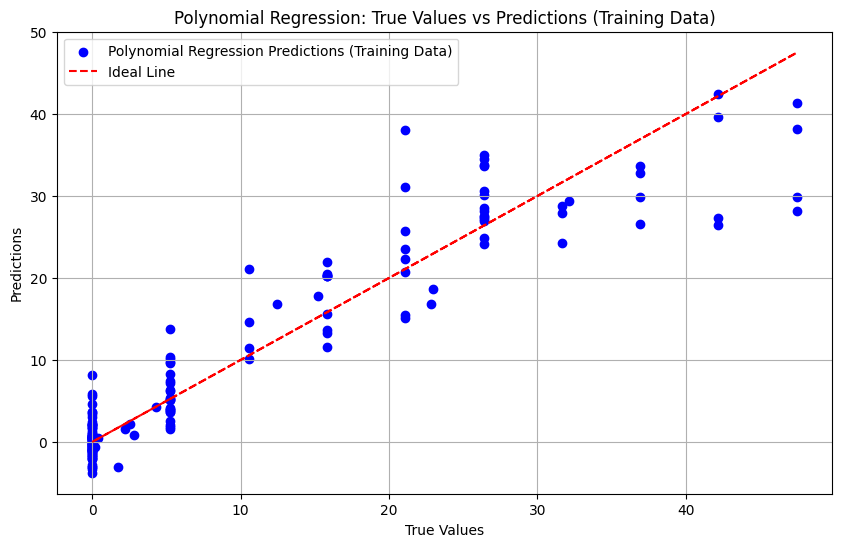

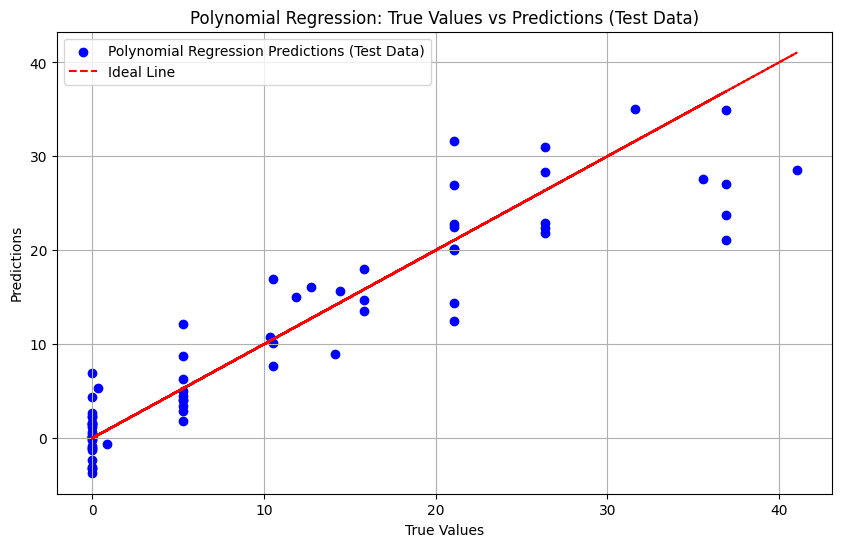

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df_clean is already defined and cleaned
data = df_clean

# Define X and y
X = data[data.columns[1:6]]
y = data['PRECTOTCORR']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial Regression Model
poly_reg = PolynomialFeatures(degree=2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)

model2 = LinearRegression()
model2.fit(X_train_poly, y_train)
predictions_train_poly = model2.predict(X_train_poly)
predictions_test_poly = model2.predict(X_test_poly)

# Plotting the training data with the best fit line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train_poly, color='blue', label='Polynomial Regression Predictions (Training Data)')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression: True Values vs Predictions (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the test data with the best fit line for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_test_poly, color='blue', label='Polynomial Regression Predictions (Test Data)')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Regression: True Values vs Predictions (Test Data)')
plt.legend()
plt.grid(True)
plt.show()


In [32]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_regressor_model.pkl')


['random_forest_regressor_model.pkl']

In [33]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean Cross-Validation R-squared:", cv_scores.mean())


Cross-Validation R-squared Scores: [0.80413771 0.88022164 0.85991927 0.83905641 0.7870246 ]
Mean Cross-Validation R-squared: 0.8340719265092498


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid with valid values only
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
best_rf_predictions = best_rf_model.predict(X_test)
print("Best Random Forest Regressor Performance on Test Data:")
print("MAE:", mean_absolute_error(y_test, best_rf_predictions))
print("MSE:", mean_squared_error(y_test, best_rf_predictions))
print("R-squared:", r2_score(y_test, best_rf_predictions))


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Regressor Performance on Test Data:
MAE: 2.8957489878157836
MSE: 20.563884089118705
R-squared: 0.8625196451334853


In [35]:
import joblib
import pandas as pd

def load_model_and_predict(new_data):
    # Load the model
    rf_model = joblib.load('random_forest_regressor_model.pkl')

    # Create a DataFrame from new data
    new_data_df = pd.DataFrame(new_data)

    # Ensure the columns are in the same order as during training
    new_data_df = new_data_df[['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M']]

    # Make predictions
    predictions = rf_model.predict(new_data_df)

    return predictions

# Example usage with new data
new_test_data = {
    'PS': [99.28, 98.97, 98.94, 99.29, 98.96],
    'T2M': [27.68, 25.78, 28.22, 26.53, 28.98],
    'RH2M': [57.12, 91.31, 77.19, 64.0, 71.75],
    'WD2M': [293.5, 271.56, 274.38, 311.37, 296.25],
    'WS2M': [1.79, 3.02, 2.49, 1.66, 2.11]
}

predictions = load_model_and_predict(new_test_data)
print("Predictions:", predictions)


Predictions: [ 0.     33.2267 13.1492  0.      1.4799]


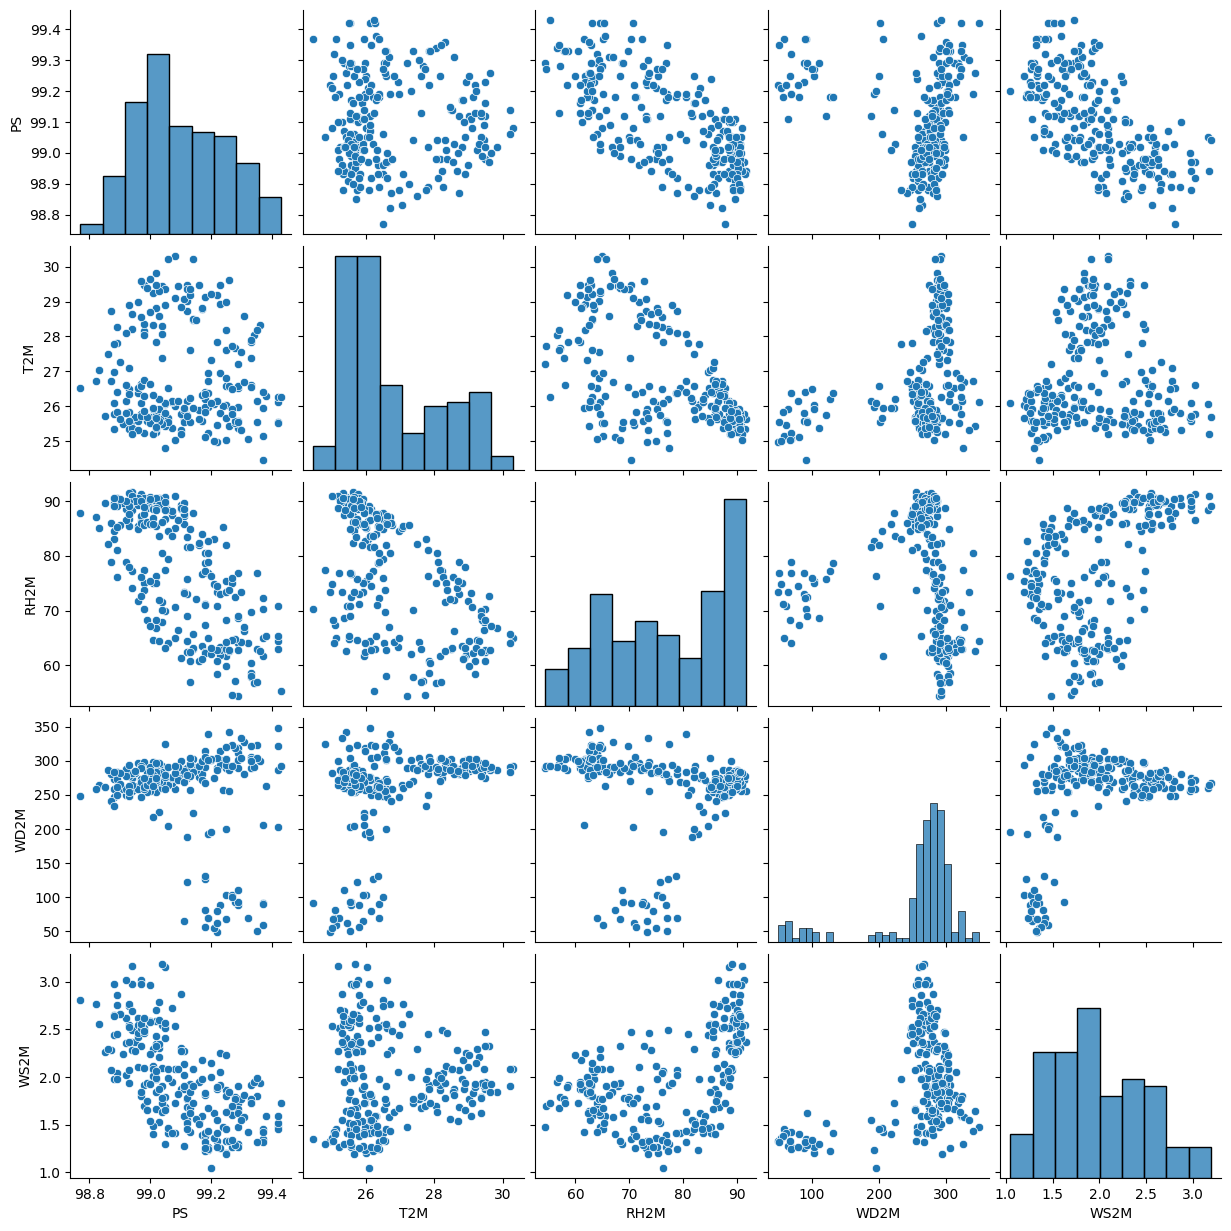

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_clean[['PS', 'T2M', 'RH2M', 'WD2M', 'WS2M']])
plt.show()


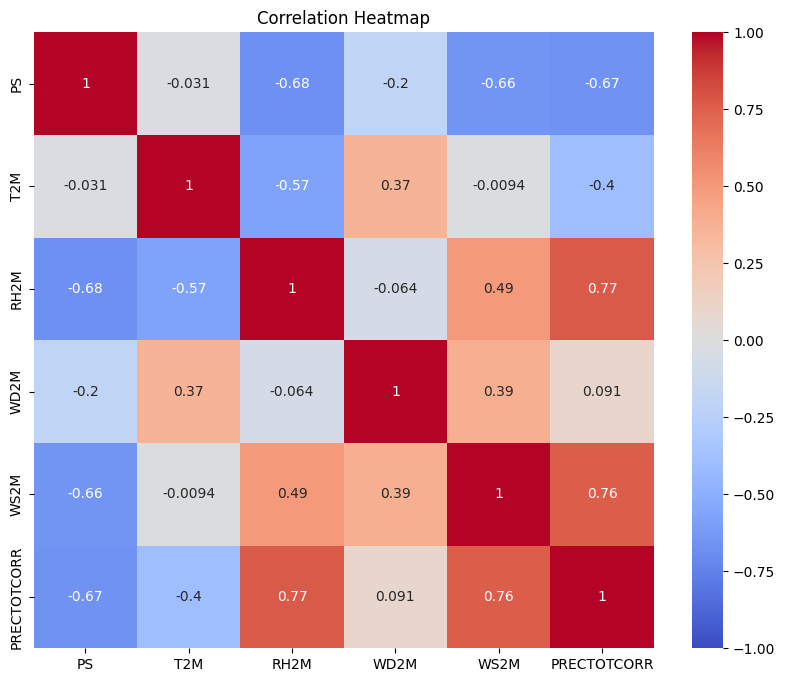

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_columns = df_clean.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


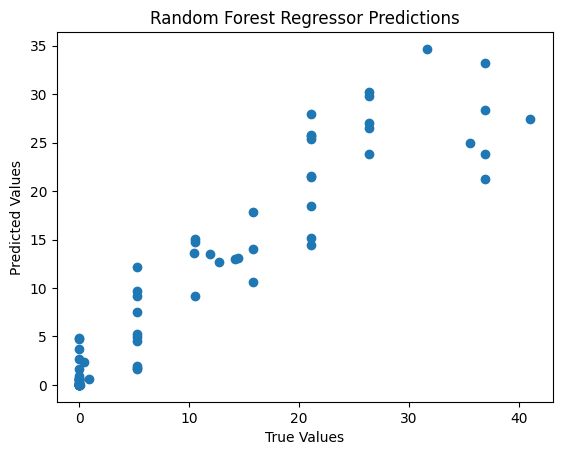

In [38]:
plt.scatter(y_test, rf_test_predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor Predictions")
plt.show()


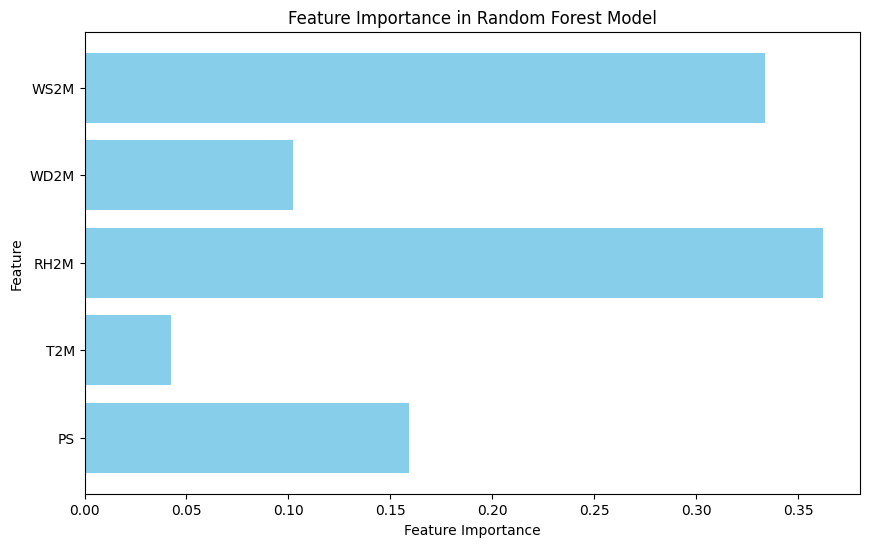

In [39]:
feature_importances = best_rf_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()


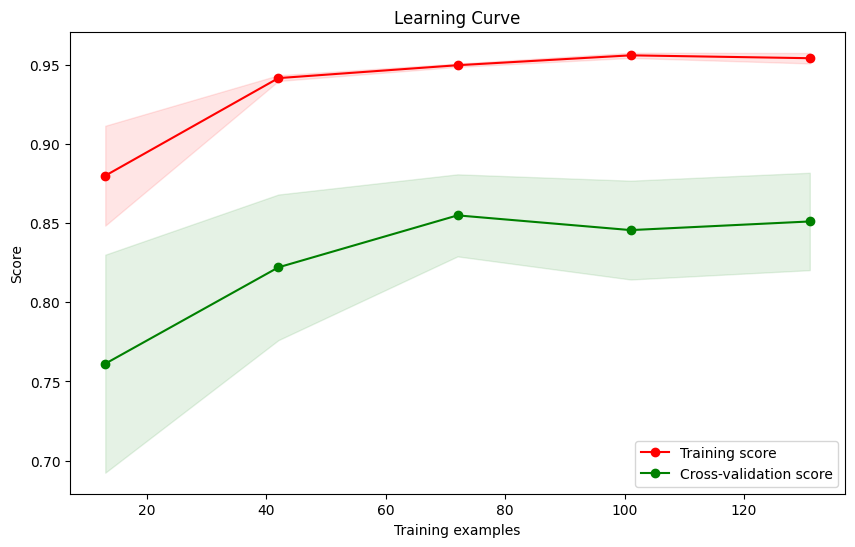

In [40]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_rf_model, X_train, y_train, cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


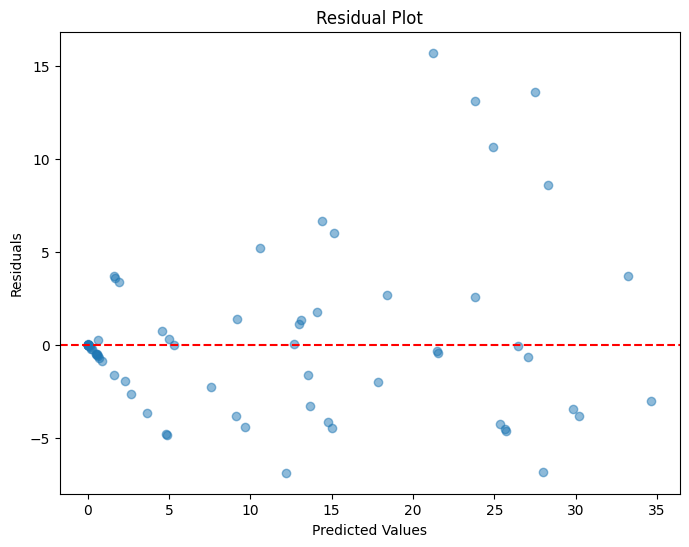

In [42]:
residuals = y_test - rf_test_predictions

plt.figure(figsize=(8, 6))
plt.scatter(rf_test_predictions, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


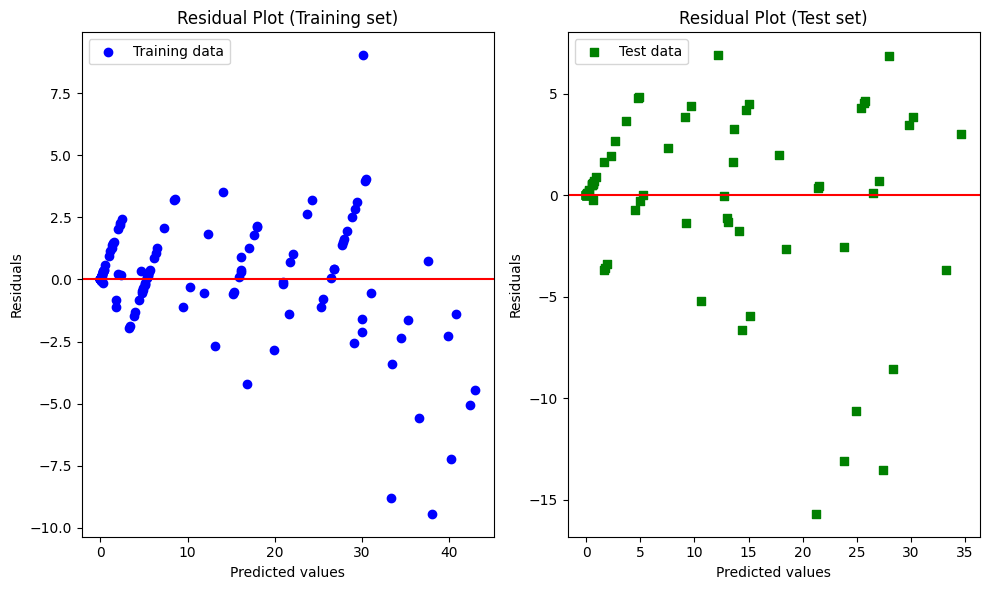

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Train Random Forest model (assuming rf_model is already trained)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

# Calculate residuals
train_residuals = rf_train_predictions - y_train
test_residuals = rf_test_predictions - y_test

# Plot residuals
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(rf_train_predictions, train_residuals, c='blue', marker='o', label='Training data')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Training set)')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.scatter(rf_test_predictions, test_residuals, c='green', marker='s', label='Test data')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Test set)')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
